In [6]:
from skimage import io
import os
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'skimage'

In [66]:
#from skimage import io
import os
import matplotlib.pyplot as plt

from PIL import Image
from PIL.TiffTags import TAGS

import numpy as np

In [9]:
img_path = os.getcwd() + '/monocytes/'

In [10]:
# Getting metadata

image = Image.open(img_path + 'YM_20220107_Exp2Cell8map-data-2022.01.07-16.34.34.510_processed-2022.01.10-12.38.51.tif')
exifdata = image.getexif()
for tag_id in exifdata:
    # get the tag name, instead of human unreadable tag id
    tag = TAGS.get(tag_id, tag_id)
    data = exifdata.get(tag_id)
    # decode bytes
    if isinstance(data, bytes):
        data = data.decode()
    print(f"{tag}: {data}")

    if tag == 'ImageWidth':
        im_w = data
    elif tag == 'ImageLength':
        im_h = data
    elif tag == 'XResolution':
        x_res = data
    elif tag == 'YResolution':
        y_res = data
    

ImageWidth: 64
ImageLength: 64
BitsPerSample: 32
Compression: 1
PhotometricInterpretation: 1
ResolutionUnit: 3
ImageDescription: no info
StripOffsets: 8
Software: asd2tiff_GUI - Arin Marchesi modified by FR
SampleFormat: 3
DateTime: 1 ms x frame       
SamplesPerPixel: 1
RowsPerStrip: 64
StripByteCounts: 16384
XResolution: 21333.396059127983
YResolution: 21333.396059127983
PlanarConfiguration: 1


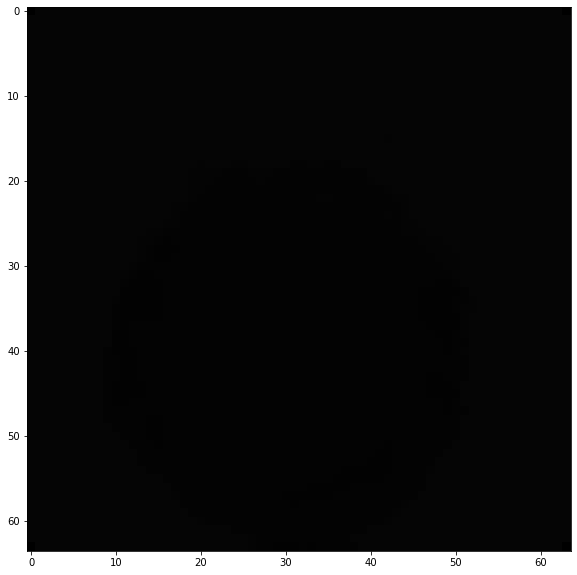

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='Greys_r')


In [2]:
from platform import python_version

print(python_version())


3.9.12


In [18]:
image_np = np.asarray(image)

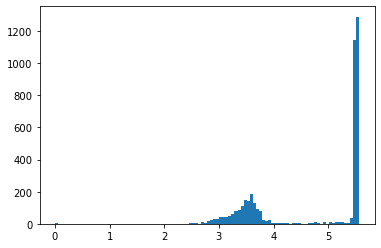

In [19]:
plt.hist(image_np.flatten(), 100);

In [20]:
np.shape(image_np.flatten())

(4096,)

In [21]:
np.shape(image_np)

(64, 64)

In [12]:
img_path = os.getcwd() + '/monocytes/'

io.use_plugin('pil')
img_opt = io.imread(img_path + '20220117_E2_Cell8BF.tif')
img_mec = io.imread(img_path + 'topo_20220107_Exp2Cell8map-data-2022.01.07-16.34.34.510_processed-2022.01.10-12.38.51.tif')

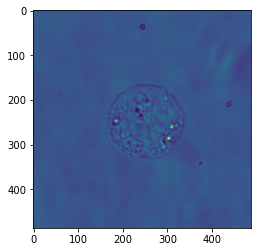

In [15]:
plt.imshow(img_opt)

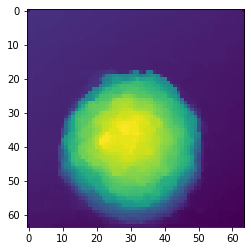

In [16]:
plt.imshow(img_mec)

In [ ]:
# resize image to the one with smaller pixel size
px_xsize_opt=468.7 #nm/pixel
px_xsize_topo=94   # nm/pixel
px_ysize_opt=468.7 #nm/pixel
px_ysize_topo=94   # nm/pixelnew_size=[round(img_topo.size[0]*px_xsize_opt/px_xsize_topo), round(img_topo.size[1]*px_ysize_opt/px_ysize_topo)]
print(new_size)if px_xsize_opt>px_xsize_topo:
    img_topo_resc = img_topo.resize(new_size)

In [17]:
# open another image
image8 = Image.open(img_path + '20220117_E2_Cell8BF.tif')

image_np8 = np.asarray(image8)

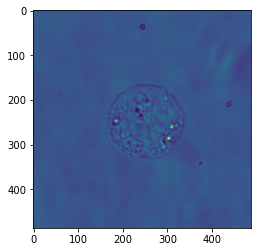

In [23]:
plt.imshow(image_np8)

In [25]:
np.shape(image_np8)

(487, 487)

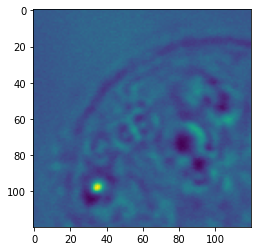

In [31]:
plt.imshow(image_np8[150:270, 150:270])

In [32]:
crop = image_np8[150:270, 150:270]

In [33]:
np.shape(crop)

(120, 120)

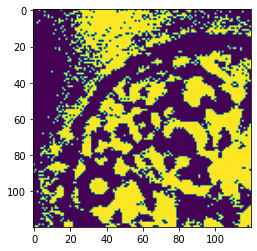

In [74]:
plt.imshow(image_np8[0:120,0:120] - crop)

In [37]:
(height, width) = np.shape(image_np8)

In [57]:
d = np.empty((height - 120, width - 120))

In [58]:
np.shape(d)

(367, 367)

In [69]:
for row in range(height - 120):
    for col in range(width - 120):
        d[row,col] = np.sum( np.square( np.subtract(image_np8[0+row : 120+row, 0+col : 120+col] , crop) ))

In [70]:
d

array([[2.19878650e+08, 2.20355949e+08, 2.20492474e+08, ...,
        2.36061217e+08, 2.35366936e+08, 2.36090110e+08],
       [2.22093475e+08, 2.21882389e+08, 2.20304238e+08, ...,
        2.32644095e+08, 2.36832434e+08, 2.38419077e+08],
       [2.20103982e+08, 2.21667040e+08, 2.18724327e+08, ...,
        2.38171300e+08, 2.37637242e+08, 2.38710704e+08],
       ...,
       [2.45429323e+08, 2.46474890e+08, 2.44529004e+08, ...,
        2.21710950e+08, 2.21849418e+08, 2.22911058e+08],
       [2.45602206e+08, 2.45122534e+08, 2.42610788e+08, ...,
        2.20498122e+08, 2.22002225e+08, 2.24647541e+08],
       [2.44764551e+08, 2.43761607e+08, 2.44553821e+08, ...,
        2.20243437e+08, 2.21397008e+08, 2.23986114e+08]])

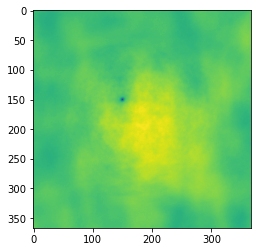

In [75]:
plt.imshow(d)

In [76]:
np.argmin(d)

55200

In [77]:
result = numpy.where(d == numpy.amin(d))
print('Tuple of arrays returned : ', result)

Tuple of arrays returned :  (array([150]), array([150]))


In [79]:
result

(array([150]), array([150]))

In [78]:
numpy.amin(d)

0.0

In [80]:
def distance_two_images(im1, im2):
    """ the euclidean square distance of two images in terms of intensity is calculated
    :im1 np.array of the big image
    :im2 np.array of the small image   """
    
    (height, width) = np.shape(im1)
    (h, w) = np.shape(im2)
    d = np.empty((height - h, width - w))
    
    for row in range(height - h):
        for col in range(width - w):
            d[row,col] = np.sum( np.square( np.subtract(im1[0+row : h+row, 0+col : w+col] , im2) ))
    
    return d
    

In [86]:
def position_of_min(d):
    """ determine the position of minimum
    :d np.array of distances """
    
    result = np.where(d == np.amin(d))
    print("the minimum distance is: ", np.amin(d))
    print('Tuple of arrays returned : ', result)
    
    return result
    

In [ ]:
# example of usage

In [82]:
distanc = distance_two_images(image_np8, crop)

In [87]:
res = position_of_min(distanc)

the minimum distance is:  0.0
Tuple of arrays returned :  (array([150]), array([150]))


In [2]:
from cellpose import models
from cellpose.io import imread
import os
import matplotlib.pyplot as plt

In [8]:
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')

files = [os.getcwd() + '/monocytes/' + '20220117_E2_Cell8BF.tif']
img = [imread(f) for f in files]
masks, flows, styles, diams = model.eval(img, diameter=150, channels=[0,0],
                                         flow_threshold=0.4, do_3D=False)

In [4]:
files = [os.getcwd() + '/monocytes/' + '20220117_E2_Cell8BF.tif']
img = [imread(f) for f in files]

In [19]:
img[0]

array([[1730, 1705, 1696, ..., 1731, 1758, 1737],
       [1748, 1776, 1782, ..., 1798, 1784, 1761],
       [1691, 1757, 1743, ..., 1741, 1698, 1713],
       ...,
       [1811, 1825, 1814, ..., 1715, 1689, 1791],
       [1718, 1765, 1777, ..., 1674, 1783, 1783],
       [1788, 1837, 1758, ..., 1678, 1732, 1717]], dtype=uint16)

In [9]:
masks

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)]

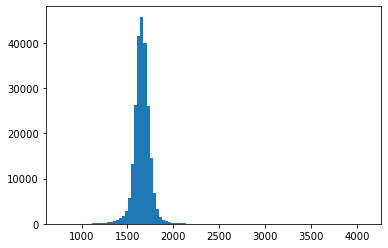

In [21]:
plt.hist(img[0].flatten(), 100);

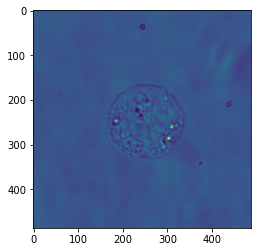

In [22]:
plt.imshow(img[0])

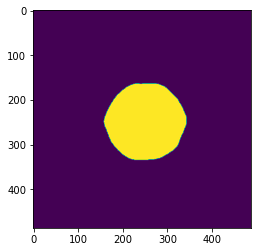

In [23]:
plt.imshow(masks[0])

In [26]:
files = [os.getcwd() + '/monocytes/' + '20220117_E2_Cell8BF.tif',
         os.getcwd() + '/monocytes/' + '20220117_E3_Cell12BF.tif',
         os.getcwd() + '/monocytes/' + '20220117_E3_Cell13BF.tif']
imgs = [imread(f) for f in files]

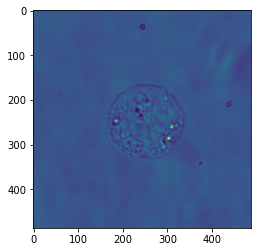

In [34]:
plt.imshow(imgs[0])

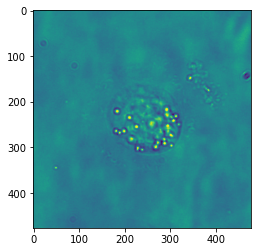

In [32]:
plt.imshow(imgs[1])

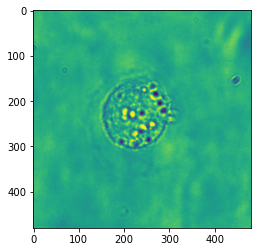

In [33]:
plt.imshow(imgs[2])

In [59]:
model = models.Cellpose(gpu=False, model_type='cyto')
masks, flows, styles, diams = model.eval(imgs, diameter=[150,150,120], channels=[3,3],
                                         flow_threshold=0.8, do_3D=False)

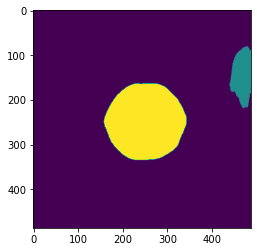

In [60]:
plt.imshow(masks[0])

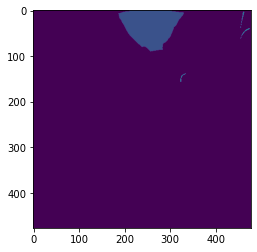

In [61]:
plt.imshow(masks[1])

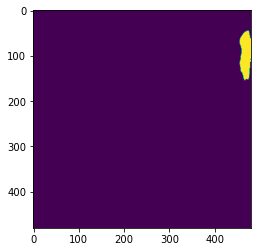

In [62]:
plt.imshow(masks[2])

In [67]:
img_path = os.getcwd() + '/data/'

In [69]:
image = Image.open(img_path + 'BF_qi-data-2022.02.02-16.35.22.711_processed-2022.04.26-19.54.49.tif')
exifdata = image.getexif()
for tag_id in exifdata:
    # get the tag name, instead of human unreadable tag id
    tag = TAGS.get(tag_id, tag_id)
    data = exifdata.get(tag_id)
    # decode bytes
    if isinstance(data, bytes):
        data = data.decode()
    print(f"{tag}: {data}")

    if tag == 'ImageWidth':
        im_w = data
    elif tag == 'ImageLength':
        im_h = data
    elif tag == 'XResolution':
        x_res = data
    elif tag == 'YResolution':
        y_res = data

ImageWidth: 1024
ImageLength: 768
BitsPerSample: (8, 8, 8)
Compression: 1
PhotometricInterpretation: 2
ResolutionUnit: 1
ExifIFD: 1088
Make: Imaging Source
Model: DFx 31BF03
StripOffsets: (3537, 28113, 52689, 77265, 101841, 126417, 150993, 175569, 200145, 224721, 249297, 273873, 298449, 323025, 347601, 372177, 396753, 421329, 445905, 470481, 495057, 519633, 544209, 568785, 593361, 617937, 642513, 667089, 691665, 716241, 740817, 765393, 789969, 814545, 839121, 863697, 888273, 912849, 937425, 962001, 986577, 1011153, 1035729, 1060305, 1084881, 1109457, 1134033, 1158609, 1183185, 1207761, 1232337, 1256913, 1281489, 1306065, 1330641, 1355217, 1379793, 1404369, 1428945, 1453521, 1478097, 1502673, 1527249, 1551825, 1576401, 1600977, 1625553, 1650129, 1674705, 1699281, 1723857, 1748433, 1773009, 1797585, 1822161, 1846737, 1871313, 1895889, 1920465, 1945041, 1969617, 1994193, 2018769, 2043345, 2067921, 2092497, 2117073, 2141649, 2166225, 2190801, 2215377, 2239953, 2264529, 2289105, 2313681, 23

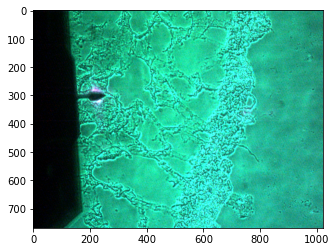

In [70]:
plt.imshow(image)

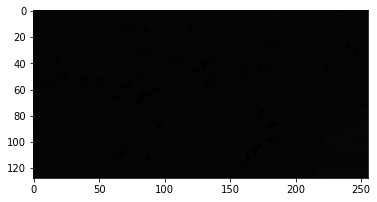

In [72]:
imageym = Image.open(img_path + 'YM_qi-data-2022.02.02-16.35.22.711_processed-2022.04.26-19.54.49.tif')
plt.imshow(imageym)

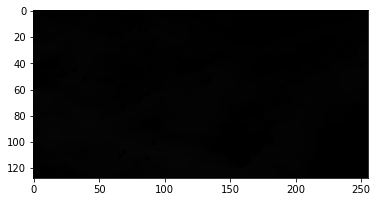

In [73]:

imagetopo = Image.open(img_path + 'topo_qi-data-2022.02.02-16.35.22.711_processed-2022.04.26-19.54.49.tif')
plt.imshow(imagetopo)

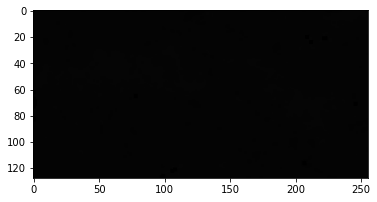

In [75]:

imag = Image.open(img_path + 'YM_qi-data-2022.02.02-18.13.50.881_processed-2022.04.26-19.47.40.tif')
plt.imshow(imag)

In [76]:
imag

ValueError: Could not save to PNG for display

<PIL.TiffImagePlugin.TiffImageFile image mode=F size=256x128 at 0x7F1AF00CD6D0>

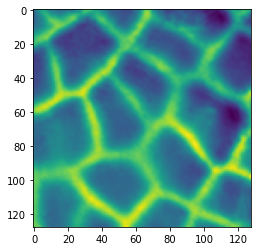

In [85]:
img_path = os.getcwd() + '/NUS_plant_meristem/YM/'
imag = Image.open(img_path + 'qi-fit-2022.03.22-15.50.57.904.tif')
plt.imshow(np.asarray(imag))

In [84]:
np.asarray(imag)

array([[3.8915033, 4.103255 , 4.313486 , ..., 4.9290113, 4.94913  ,
        4.8591757],
       [3.8306212, 3.9756675, 4.1503787, ..., 4.943088 , 4.7621403,
        4.54487  ],
       [3.710784 , 3.9192178, 4.0970016, ..., 4.768471 , 4.4766517,
        4.103431 ],
       ...,
       [5.41724  , 5.3270264, 5.172327 , ..., 4.5061493, 4.38103  ,
        4.1927705],
       [5.438675 , 5.3754067, 5.2785273, ..., 4.6465898, 4.5693045,
        4.280341 ],
       [5.333559 , 5.2417345, 5.298698 , ..., 4.6870003, 4.5532236,
        4.3935685]], dtype=float32)

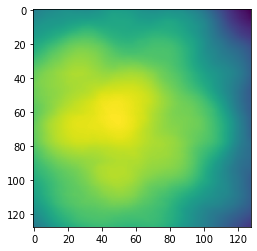

In [87]:
img_path = os.getcwd() + '/NUS_plant_meristem/topo/'
imagt = Image.open(img_path + 'qi-data-2022.03.22-15.50.57.904_reference-force-height-measured-default.tif')
plt.imshow(np.asarray(imagt))

In [89]:
def implot(partpath, imname):
    im = Image.open(os.getcwd() + '/NUS_plant_meristem' + partpath + imname)
    plt.imshow(np.asarray(im))

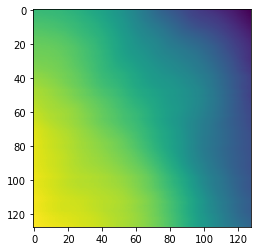

In [91]:
implot('/topo/', 'qi-data-2022.03.22-15.19.34.648_reference-force-height-measured-default.tif')

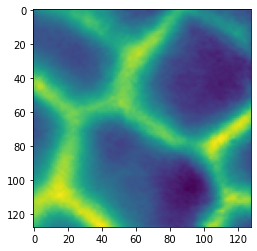

In [93]:
implot('/YM/' , 'qi-fit-2022.03.22-15.19.34.648.tif')